In [103]:
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
import cv2
import glob
import math
from mpl_toolkits import mplot3d
from itertools import combinations
import cv2

In [189]:
Imgs = []
for file in glob.glob('Data\FeatureMatching\Room*'):
    Imgs.append(cv2.imread(file))
    #Imgs.append(cv2.rotate(cv2.imread(file), cv2.ROTATE_90_CLOCKWISE))

In [190]:
'''points1 = np.array([[ 356,  394, 1],
                    [1368,  369, 1],
                    [1514,  694, 1],
                    [1157,  224, 1],
                    [1062,  213, 1],
                    [ 291,  927, 1],
                    [ 566,  934, 1],
                    [ 754,  975, 1],
                    [ 786,  981, 1],
                    [ 977,  944, 1],
                    [1294,  956, 1],
                    [ 782,  212, 1],
                    [ 604,  287, 1],
                    [ 952,  268, 1]])
points2 = np.array([[406, 306, 1],
                    [1436, 410, 1],
                    [1516, 697, 1],
                    [1302, 252, 1],
                    [1195, 224, 1],
                    [341, 1011, 1],
                    [722, 979, 1],
                    [934, 1007, 1],
                    [965, 1008, 1],
                    [1148, 947, 1],
                    [1398, 934, 1],
                    [990, 179, 1],
                    [768, 224, 1],
                    [1127, 266, 1]])
points1.shape, points2.shape'''

'points1 = np.array([[ 356,  394, 1],\n                    [1368,  369, 1],\n                    [1514,  694, 1],\n                    [1157,  224, 1],\n                    [1062,  213, 1],\n                    [ 291,  927, 1],\n                    [ 566,  934, 1],\n                    [ 754,  975, 1],\n                    [ 786,  981, 1],\n                    [ 977,  944, 1],\n                    [1294,  956, 1],\n                    [ 782,  212, 1],\n                    [ 604,  287, 1],\n                    [ 952,  268, 1]])\npoints2 = np.array([[406, 306, 1],\n                    [1436, 410, 1],\n                    [1516, 697, 1],\n                    [1302, 252, 1],\n                    [1195, 224, 1],\n                    [341, 1011, 1],\n                    [722, 979, 1],\n                    [934, 1007, 1],\n                    [965, 1008, 1],\n                    [1148, 947, 1],\n                    [1398, 934, 1],\n                    [990, 179, 1],\n                    [768,

In [191]:
'''points1 = []
points2 = []
def print_point1(event, x, y, flags, params):
    if event == cv2.EVENT_FLAG_LBUTTON:
        points1.append([x, y])
        print(x, y)
def print_point2(event, x, y, flags, params):
    if event == cv2.EVENT_FLAG_LBUTTON:
        points2.append([x, y])
        print(x, y)
cv2.namedWindow("Room1", cv2.WINDOW_NORMAL)
cv2.imshow('Room1', Imgs[0])
cv2.setMouseCallback('Room1', print_point1)
cv2.namedWindow("Room2", cv2.WINDOW_NORMAL)
cv2.imshow('Room2', Imgs[1])
cv2.setMouseCallback('Room2', print_point2)
while True:
    # wait for Esc or q key and then exit
    key = cv2.waitKey(1) & 0xFF
    if key == 27 or key == ord("q"):
        cv2.destroyAllWindows()
        break

np.save('kp.npy', np.array([points1, points2]))'''

temp = np.load('kp.npy')
points1 = np.ones((23, 3))
points2 = np.ones((23, 3))
points1[:,:2] = temp[0]
points2[:,:2] = temp[1]

In [192]:
'''file = open('Data/CameraModel/2D/house.000.corners', 'r')
points1 = np.array([ np.array(st.split()).astype(float) for st in file.read().split('\n')[:-1] ])
points1 = np.hstack((points1, np.ones((points1.shape[0], 1))))
file = open('Data/CameraModel/2D/house.001.corners', 'r')
points2 = np.array([ np.array(st.split()).astype(float) for st in file.read().split('\n')[:-1] ])
points2 = np.hstack((points2, np.ones((points2.shape[0], 1))))

file = open('Data/CameraModel/2D/house.nview-corners', 'r')
match_table = np.array([ st.split() for st in file.read().split('  \n')[:-1] ])[:,:2]
matches = (match_table[:,0] != '*') & (match_table[:,1] != '*')
matches = match_table[matches].astype(int)

points1 = points1[list(matches[:,0])].astype(int)
points2 = points2[list(matches[:,1])].astype(int)

Imgs = []
file = open('Data/CameraModel/images/house.000.pgm', 'rb')
file.readline() == 'P5\n'
W, H = np.array(file.readline().split()).astype(int)
depth = file.readline()
img = np.zeros((H, W))
for y in range(H):
    for x in range(W):
        img[y, x] = ord(file.read(1))
Imgs.append(img)

file = open('Data/CameraModel/images/house.001.pgm', 'rb')
file.readline() == 'P5\n'
W, H = np.array(file.readline().split()).astype(int)
depth = file.readline()
img = np.zeros((H, W))
for y in range(H):
    for x in range(W):
        img[y, x] = ord(file.read(1))
Imgs.append(img)'''

"file = open('Data/CameraModel/2D/house.000.corners', 'r')\npoints1 = np.array([ np.array(st.split()).astype(float) for st in file.read().split('\n')[:-1] ])\npoints1 = np.hstack((points1, np.ones((points1.shape[0], 1))))\nfile = open('Data/CameraModel/2D/house.001.corners', 'r')\npoints2 = np.array([ np.array(st.split()).astype(float) for st in file.read().split('\n')[:-1] ])\npoints2 = np.hstack((points2, np.ones((points2.shape[0], 1))))\n\nfile = open('Data/CameraModel/2D/house.nview-corners', 'r')\nmatch_table = np.array([ st.split() for st in file.read().split('  \n')[:-1] ])[:,:2]\nmatches = (match_table[:,0] != '*') & (match_table[:,1] != '*')\nmatches = match_table[matches].astype(int)\n\npoints1 = points1[list(matches[:,0])].astype(int)\npoints2 = points2[list(matches[:,1])].astype(int)\n\nImgs = []\nfile = open('Data/CameraModel/images/house.000.pgm', 'rb')\nfile.readline() == 'P5\n'\nW, H = np.array(file.readline().split()).astype(int)\ndepth = file.readline()\nimg = np.zero

<IPython.core.display.Javascript object>


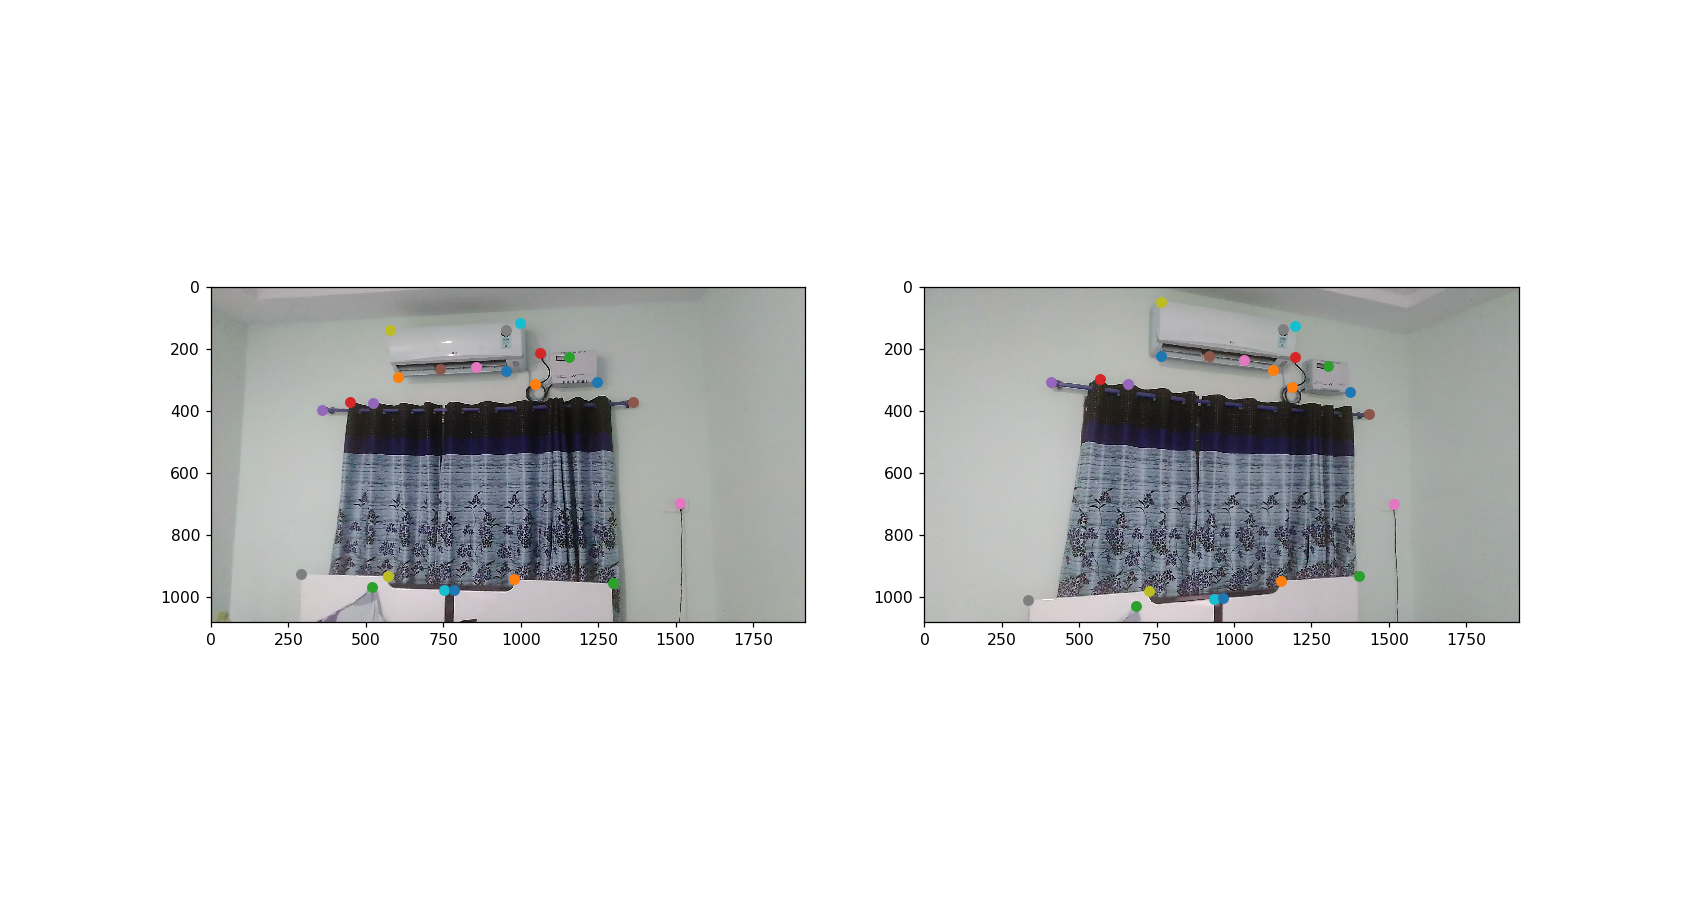

In [193]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

axs[0].imshow(Imgs[0], cmap='gray')
for point in points1:
    axs[0].plot(point[0], point[1], 'o')
axs[1].imshow(Imgs[1], cmap='gray')
for point in points2:
    axs[1].plot(point[0], point[1], 'o')

In [194]:
class FundamentalCameraMatrix:
    
    def __init__(self):
        #self.Imgs = Imgs
        #print(f'Starting Fundamental Matrix & Camera Matrix calculation')
        return
    
    def ImgPairDetails(self, points1, points2, img1, img2):
        self.points1 = points1
        self.points2 = points2
        self.Imgs = [img1, img2]
        #self.f = f
        self.x0 = img1.shape[1] // 2
        self.y0 = img1.shape[0] // 2
        self.num_runs = 0
        self.create_intrinsic_K()
        
    def create_intrinsic_K(self):
        '''self.K = np.array([ [self.y0/5, 0, self.x0],
                            [0, self.y0/5, self.y0],
                            [0, 0, 1] ])'''
        
        self.K = np.array([[1390.30384, 0, 963.602425],
                        [0, 1388.07396, 544.026776],
                        [0, 0, 1]])
    
    def create_matrix_A(self, points1, points2):
        '''
        Arguements
            points1 : np.ndarray of shape (8, 3), represents 8 points from image1.
            points2 : np.ndarray of shape (8, 3), represents 8 points from image2.
        Return
            A : `A` matrix of shape (8, 9)
        '''
        A = []
        for i in range(points1.shape[0]):
            A.append(np.matmul(points2[i].reshape((3, 1)), points1[i].reshape((1, 3))).ravel())
        A = np.array(A)
        return A
    
    def normalized_fundamental(self, points1, points2):
        '''
        Arguments
            points1 : np.ndarray of shape (8, 3), represents 8 points from image1.
            points2 : np.ndarray of shape (8, 3), represents 8 points from image2.
        Return
            F_mat : Fundamental Matrix for image1 and image2
        Procedure
            1) Normalize the image coordinates
            2) Find f of A*f=0 using SVD of A matrix
            3) Shape f into a 3x3 matrix and normalize it and perform `Rank Enforcement`
            4) Denormalize F (Undo the 1st step)
        '''
        #Convert Homogenous coordinates to Image Coordinates
        points1 = points1 / points1[:,2].reshape((-1,1))
        points2 = points2 / points2[:,2].reshape((-1,1))
        
        # First, normalize the points
        '''mean1 = np.mean(points1, axis=0)
        mean2 = np.mean(points2, axis=0)
        
        std1 = math.sqrt(2) / np.std(points1[:,:2])
        std2 = math.sqrt(2) / np.std(points2[:,:2])
        
        T1 = np.matmul( [ [std1, 0, 0], [0, std1, 0], [0, 0, 1] ], [ [1, 0, -1*mean1[0]], [0, 1, -1*mean1[1]], [0, 0, 1] ] )
        T2 = np.matmul( [ [std2, 0, 0], [0, std2, 0], [0, 0, 1] ], [ [1, 0, -1*mean2[0]], [0, 1, -1*mean2[1]], [0, 0, 1] ] )'''
        
        std_x, std_y = math.sqrt(2) / np.std(range(int(self.x0*2))), math.sqrt(2) / np.std(range(int(self.y0*2)))
        mean_x, mean_y = np.mean(range(int(self.x0*2))), np.mean(range(int(self.y0*2)))
        T = np.array( [[std_x, 0, -1*std_x*mean_x],
                       [0, std_y, -1*std_y*mean_y],
                       [0, 0, 1]] )
        T1 = T
        T2 = T
        
        points_hat1 = np.matmul(T1, points1.T).T
        points_hat2 = np.matmul(T2, points2.T).T
        
        #Second, Find f using SVD on A
        A_mat = self.create_matrix_A(points_hat1, points_hat2)
        U, S, V = np.linalg.svd(A_mat)
        #print(np.matmul(U, np.matmul(np.eye(8, 9)*S.reshape((-1,1)), V)) - A_mat)
        #F = V[np.argmin(S)].reshape((3, 3))
        F = V[-1].reshape((3, 3))
        #print(np.around(F, 4))
        
        # Apply `Rank Enforcement`
        U, S, V = np.linalg.svd(F)
        S = np.diag(S)
        S[-1] = 0
        F = np.matmul(U, np.matmul(S, V))
        F = F/F[2,2]
        #print(np.around(F, 4))
        
        # De-normalizing
        F = np.matmul(T2.T, np.matmul(F, T1))
        F = F/F[2,2]
        #print(np.around(F, 4))
        
        return F
    
    def epipolar_line_points(self, F, points_main, points_plot, img, ax, epipole):
        '''
        
        '''
        color = ['blue', 'orange', 'green', 'red', 'purple']
        Img = self.Imgs[img]
        ax.imshow(Img, cmap='gray')
        for i, point in enumerate(points_main):
            ax.plot(points_plot[i][0]/points_plot[i][2], points_plot[i][1]/points_plot[i][2], 'o', color=color[i])
            if img:
                line = np.matmul(F, point.T)
            else:
                line = np.matmul(point, F)
            x_axis = np.linspace(20, Img.shape[1]-20, 200)
            y_axis = (line[0]*x_axis + line[2]) / (-1*line[1])
            
            valid_index = (y_axis>20) & (y_axis<Img.shape[0] - 20)
            x_axis = x_axis[valid_index]
            y_axis = y_axis[valid_index]
            ax.plot(x_axis, y_axis, alpha=0.5, color=color[i])
            
        if epipole:
            F = F.T if img else F
            _, _, V = np.linalg.svd(F)
            epipole = V[-1]
            epipole = epipole / epipole[2]
            ax.plot(epipole[0], epipole[1], 'o', 'black')
    
    def plot_epipoler_epipole(self, F, points1, points2, epipole):
        '''
        
        '''
        fig, axs = plt.subplots(1, 2, figsize=(15, 15))
        self.epipolar_line_points(F, points2, points1, 0, axs[0], epipole)
        self.epipolar_line_points(F, points1, points2, 1, axs[1], epipole)
        plt.show()
    
    def fundamental_matrix_RANSAC(self, loop, thld, plot, epipole):
        '''
        Arguments
            points1 : np.ndarray of shape(n, 3), `n` is number of points in image1 matched to image1.
            points2 : np.ndarray of shape(n, 3), `n` is number of points in image2 matched to image1.
        Return
            F_best : Fundamental Matrix (3x3), with least error in matching points.
        '''
        
        for i in range(loop):
            eight_points = np.random.choice(range(self.points1.shape[0]), 8, replace=False)
            F = self.normalized_fundamental(self.points1[eight_points], self.points2[eight_points])
            
            inliers = np.matmul(self.points2, F)
            inliers = np.sum(inliers * self.points1, axis=1) / np.sqrt(np.sum(inliers[:,:2]**2, axis=1))
            inliers = np.sum(np.abs(inliers) < thld)
            
            if i == 0 or inliers > num_inliers:
                num_inliers = inliers
                F_best = F

        '''ret, mask = cv2.findFundamentalMat(self.points1, self.points2, cv2.FM_RANSAC, 1)
        print(ret, mask.sum())
        F_best = ret'''
        
        if plot:
            #eight_points = np.array([5, 12, 15, 20, 1])
            eight_points = np.random.choice(range(self.points1.shape[0]), 5, replace=False)
            self.plot_epipoler_epipole(F_best, self.points1[eight_points], self.points2[eight_points], epipole)
        
        print(f'Num. of inliers for best F-matrix : {num_inliers}')
        self.F = F_best
    
    def essential_matrix(self):
        E = np.matmul(self.K.T, np.matmul(self.F, self.K))
        U, S, Vt = np.linalg.svd(E)
        #e = (S[0] + S[1]) / 2
        S = np.diag([1, 1, 0])
        if np.linalg.det(np.matmul(U, Vt)) < 0:
            self.E = np.matmul(U, np.matmul(S, -1*Vt))
        else:
            self.E = np.matmul(U, np.matmul(S, Vt))
    
    def camera_matrix(self, plot, thld_angle, reprojection):              
        W = np.array( [ [0, -1, 0],
                        [1, 0, 0],
                        [0, 0, 1] ] )
        Z = np.array( [ [0, 1, 0],
                        [-1, 0, 0],
                        [0, 0, 0] ] )
        self.P1 = np.array( [ [1, 0, 0, 0],
                              [0, 1, 0, 0],
                              [0, 0, 1, 0]] )
        self.M1 = np.matmul(self.K, self.P1)
        
        U, S, Vt = np.linalg.svd(self.E)
        
        T = np.matmul(U, np.matmul(Z, U.T))
        U3 = np.array( [ T[2, 1], T[0, 2], T[1, 0] ] ).reshape((3, 1)) * 10
        
        R1 = np.matmul(U, np.matmul(W, Vt))
        R2 = np.matmul(U, np.matmul(W.T, Vt))
        R1 = R1 if np.linalg.det(R1)>0 else -1*R1
        R2 = R2 if np.linalg.det(R1)>0 else -1*R2
        
        P2_possible = np.array([ np.hstack((R1, U3)), 
                                 np.hstack((R2, U3)), 
                                 np.hstack((R1, -1 * U3)), 
                                 np.hstack((R2, -1 * U3)) ])
        
        '''e = np.linalg.svd(self.F.T)[2][-1]
        e = e / e[-1]
        Te = np.array( [ [0, -e[2], e[1]], [e[2], 0, e[0]], [-e[1], e[0], 0] ] )
        p2 = np.vstack((np.dot(Te, self.F.T).T, e)).T
        print(p2)'''
        
        num_points = np.zeros(4)
        for i, P2 in enumerate(P2_possible):
            M2 = np.matmul(self.K, P2)
            num_points[i] = self.calP2possibility(P2, M2, thld_angle, plot, reprojection)
        
        print('Number of Interest Points lying infront of both cameras for different orientations :', list(num_points.astype(int)))
        self.P2 = P2_possible[np.argmax(num_points)]
        self.M2 = np.matmul(self.K, self.P2)
        
        return (num_points == self.points1.shape[0]).sum()
    
    def check_point_presence(self, points, P2, M2, thld_angle):
        points = points[:,:3] / np.sqrt(np.sum(points[:,:3]**2, axis=1)).reshape((-1, 1))
        Z1 = np.array([[0], [0], [1]])
        dot1 = np.matmul(points, Z1)
        angle1 = np.arccos(dot1) * (180 / np.pi)
        
        R = P2[:,:3]
        points = np.matmul(R, points.T).T
        Z2 = np.matmul(R, Z1)
        dot2 = np.matmul(points, Z2)
        angle2 = np.arccos(dot2) * (180 / np.pi)
        
        visible = (angle1 < thld_angle) & (angle2 < thld_angle)
        visible = visible.sum()
        
        return visible
    
    def plot3D_P2(self, P2, points):
        ax1 = plt.figure().gca(projection='3d')
        
        Cam1 = np.array([0, 0, 0])
        Z0 = np.array([0, 0, 1])
        Cam2 = np.matmul(-1*P2[:,:3], P2[:,-1])
        Z1 = np.matmul(P2[:,:3], Z0) + Cam2
        print(np.arccos(np.dot(Z0, np.matmul(P2[:,:3], Z0))) * (180 / np.pi))
        
        ax1.plot3D([Z0[0], Z1[0]], [Z0[1], Z1[1]], [Z0[2], Z1[2]], 'v')
        #ax1.plot3D([Cam1[0], Cam2[0]], [Cam1[1], Cam2[1]], [Cam1[2], Cam2[2]], 'o')
        ax1.plot3D([0, 0], [0, 0], [0, 1])
        ax1.plot3D([Cam2[0], Z1[0]], [Cam2[1], Z1[1]], [Cam2[2], Z1[2]])
        for i, p in enumerate(points):
            ax1.plot3D([p[0]], [p[1]], [p[2]], 'o')
    
    def calP2possibility(self, P2, M2, thld_angle, plot, reprojection):
        points = []
        for p1, p2 in zip(self.points1, self.points2):
            
            temp = np.zeros((6, 6))
            temp[:3,:4] = self.M1
            temp[3:,:4] = M2
            temp[:3,4] = -p1
            temp[3:,5] = -p2
            U, S, Vt = np.linalg.svd(temp)
            X = Vt[-1, :4]
            X = X / X[3]
            points.append(X)
            Q = np.vstack((np.matmul(p1, self.M1), np.matmul(p2, M2)))
            
            '''
            p1 = p1[:2].reshape((2, 1))
            p2 = p2[:2].reshape((2, 1))
            
            Q = np.vstack((np.matmul(p1, self.P1[2].reshape((1, 4))), np.matmul(p2, P2[2].reshape((1, 4)))))
            Q = Q - np.vstack((self.P1[:2], P2[:2]))
            
            p1 = np.array( [ [-1, 0, p1[0]],
                             [0, -1, p1[1]] ] )
            p2 = np.array( [ [-1, 0, p2[0]],
                             [0, -1, p2[1]] ] )
            
            U, S, V = np.linalg.svd(Q)
            X = V[-1]
            X = X / X[-1]
            points.append(X)
            '''
            
        points = np.array(points)
        visible = self.check_point_presence(points, P2, M2, thld_angle)
        
        if plot:
            self.plot3D_P2(P2, points)
        
        if reprojection:
            self.check_reprojection(M2, points)
        
        return visible
    
    def check_reprojection(self, M2, points):
        points1 = np.matmul(self.M1, points.T).T
        points1 = points1 / points1[:,-1].reshape((-1, 1))
        points1 = points1.astype(int)
        points2 = np.matmul(M2, points.T).T
        points2 = points2 / points2[:,-1].reshape((-1, 1))
        points2 = points2.astype(int)
        print('Reprojection Error')
        for i in range(points1.shape[0]):
            print('>>>  ', (points1[i] - self.points1[i]), (points2[i] - self.points2[i]))
            
    def Calculate_F_E_C_Matrix(self, reprojection=False, loop_F_mat=200, thld_F_inliers=0.2, thld_P2_angle=70, plot_epipolar_line=False, plot_3D_P2=False, plot_epipole=False):        
        
        num_runs = 1
        print('Total number of Interest Points :', self.points1.shape[0])
        self.fundamental_matrix_RANSAC(loop_F_mat, thld_F_inliers, plot_epipolar_line, plot_epipole)
        self.essential_matrix()
        check = self.camera_matrix(plot_3D_P2, thld_P2_angle, reprojection)
        
        while check != 1:
            clear_output()
            num_runs += 1
            print('Total number of Interest Points :', self.points1.shape[0])
            self.fundamental_matrix_RANSAC(loop_F_mat, thld_F_inliers, plot_epipolar_line, plot_epipole)
            self.essential_matrix()
            check = self.camera_matrix(plot_3D_P2, thld_P2_angle, reprojection)
            
        print(f'Completed after {num_runs} {"run" if num_runs==1 else "runs"}')
        return self.F, self.E, self.K, self.P1, self.M1, self.K, self.P2, self.M2

In [199]:
%matplotlib notebook
temp = FundamentalCameraMatrix()
temp.ImgPairDetails(points1, points2, Imgs[0], Imgs[1])
Matrices = temp.Calculate_F_E_C_Matrix(plot_3D_P2=False)

Total number of Interest Points : 23
Num. of inliers for best F-matrix : 7
Number of Interest Points lying infront of both cameras for different orientations : [23, 2, 0, 21]
Completed after 1 run


In [23]:
Chess = []
for file in glob.glob('Data/CameraModel/ChessBoard/*'):
    Chess.append(cv2.imread(file))

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
CHECKERBOARD = (8, 6)

objpoints = []
imgpoints = []

objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)

for i, img in enumerate(Chess):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, 
                            cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    
    if ret:
        objpoints.append(objp)
        corners = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
        
        imgpoints.append(corners)
        
        cv2.drawChessboardCorners(img, CHECKERBOARD, corners, ret)
    
H, W = img.shape[:2]

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (W, H), None, None)
mtx

array([[1.39030384e+03, 0.00000000e+00, 9.63602425e+02],
       [0.00000000e+00, 1.38807396e+03, 5.44026776e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])